In [18]:
%run setup.py

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.config import EXTERNAL_DATA_DIR

In [20]:
heart_failure_df = pd.read_csv(EXTERNAL_DATA_DIR / "heart_failure.csv")
heart_failure_df

,death_event,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,1,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,1,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,1,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,0,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,0,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,0,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [21]:
heart_failure_df.isnull().sum()

death_event                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [25]:
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']

heart_failure_df.drop(columns=categorical_features).describe()

heart_failure_df['smoking'].value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

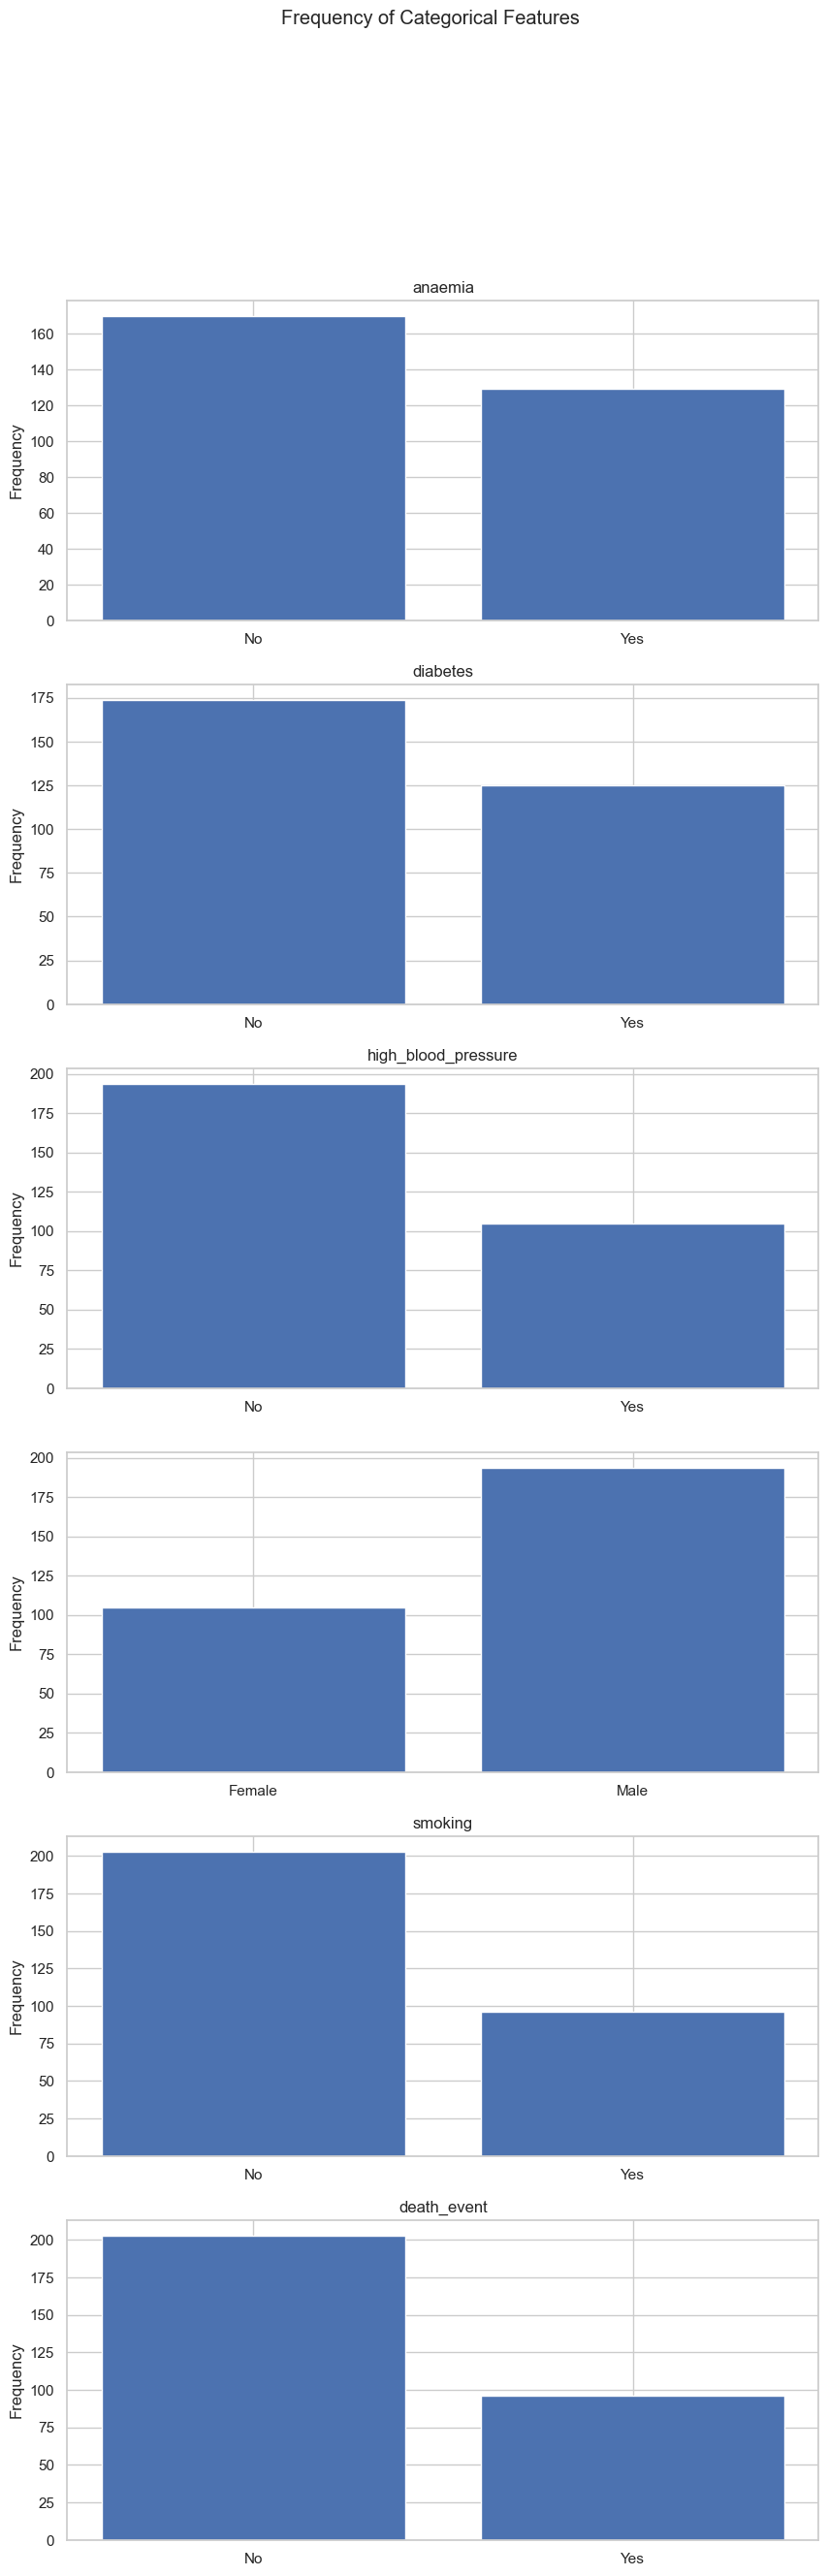

In [40]:
plt.figure(figsize=(10,30))
plt.suptitle("Frequency of Categorical Features")

for i, col in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i+1)
    series = heart_failure_df[col].value_counts()
    plt.bar(series.index, series.values)
    plt.ylabel("Frequency")
    
    if col == 'sex':
        plt.xticks([0, 1], ['Female', 'Male'])
    else:
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.title(col)

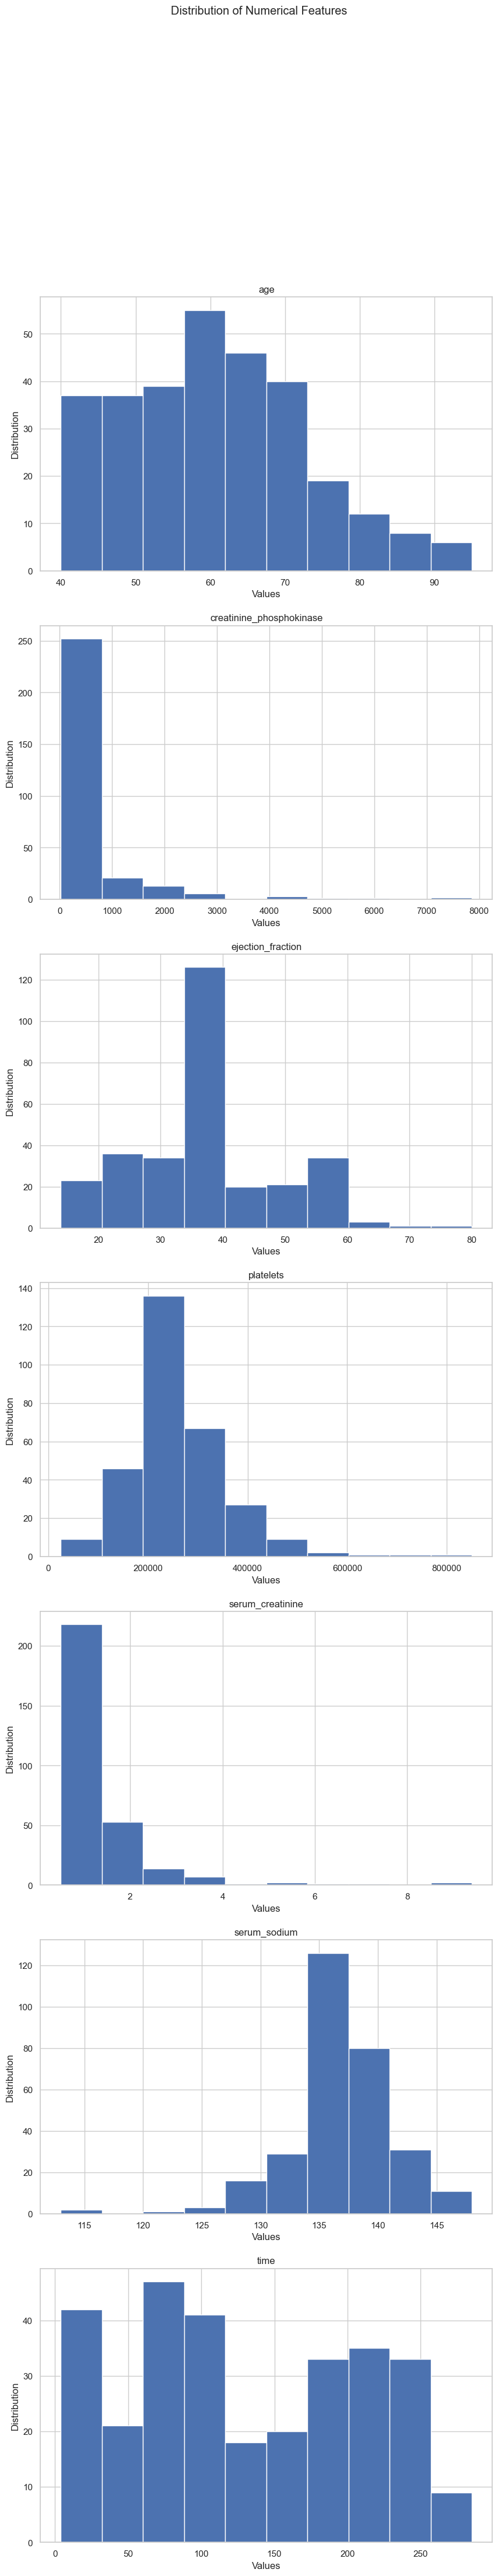

In [39]:
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

plt.figure(figsize=(10,50))
plt.suptitle("Distribution of Numerical Features")

for i, col in enumerate(numeric_features):
    plt.subplot(len(numeric_features), 1, i+1)
    heart_failure_df[col].hist()
    plt.ylabel("Distribution")
    plt.xlabel("Values")
    plt.title(col)

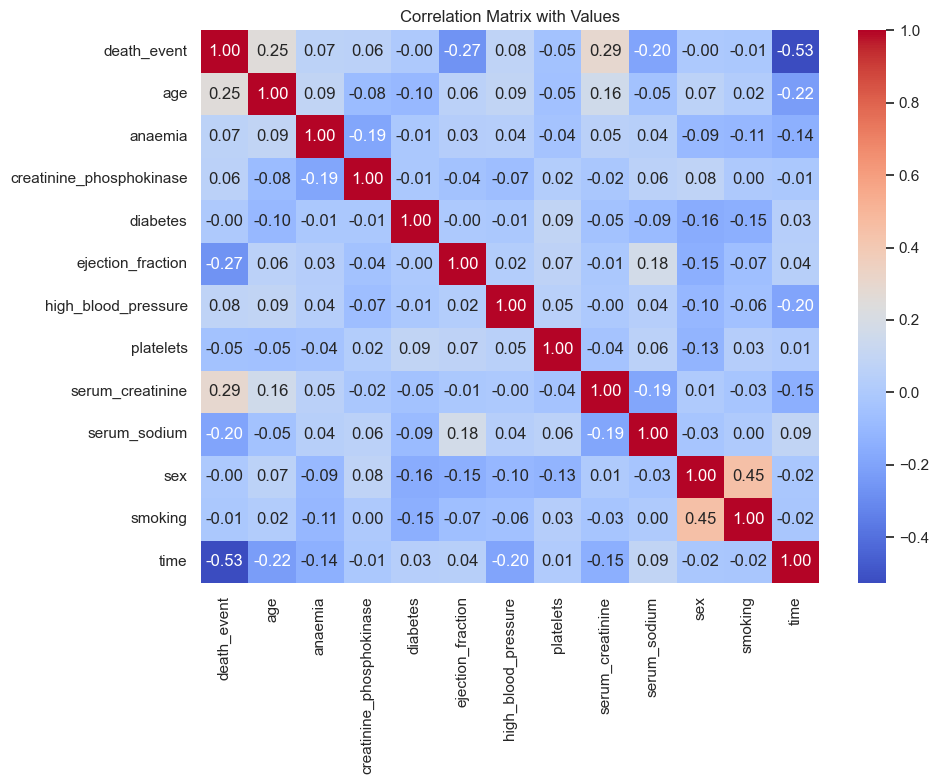

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(heart_failure_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix with Values")
plt.tight_layout()
plt.show()

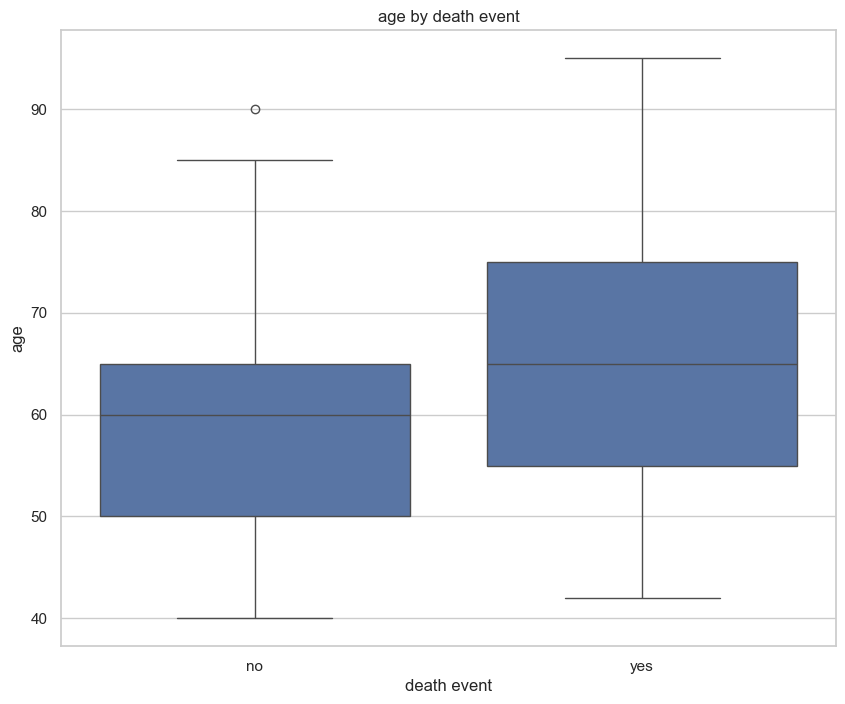

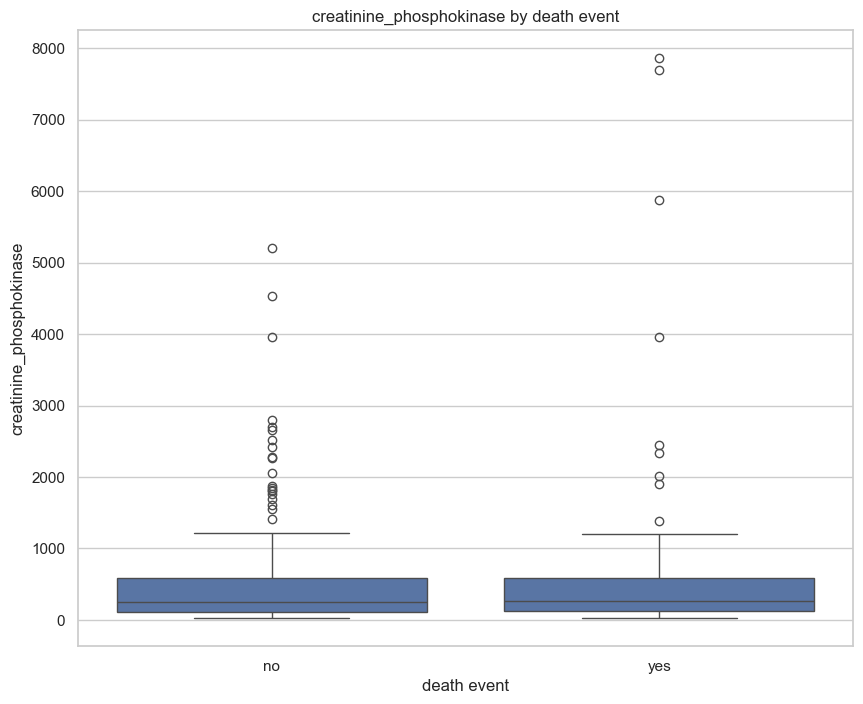

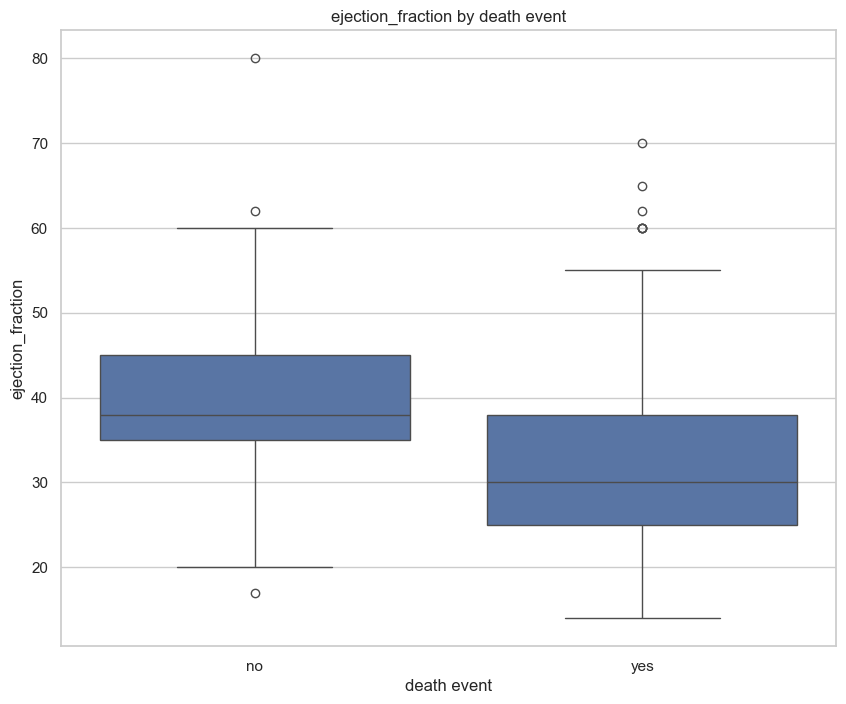

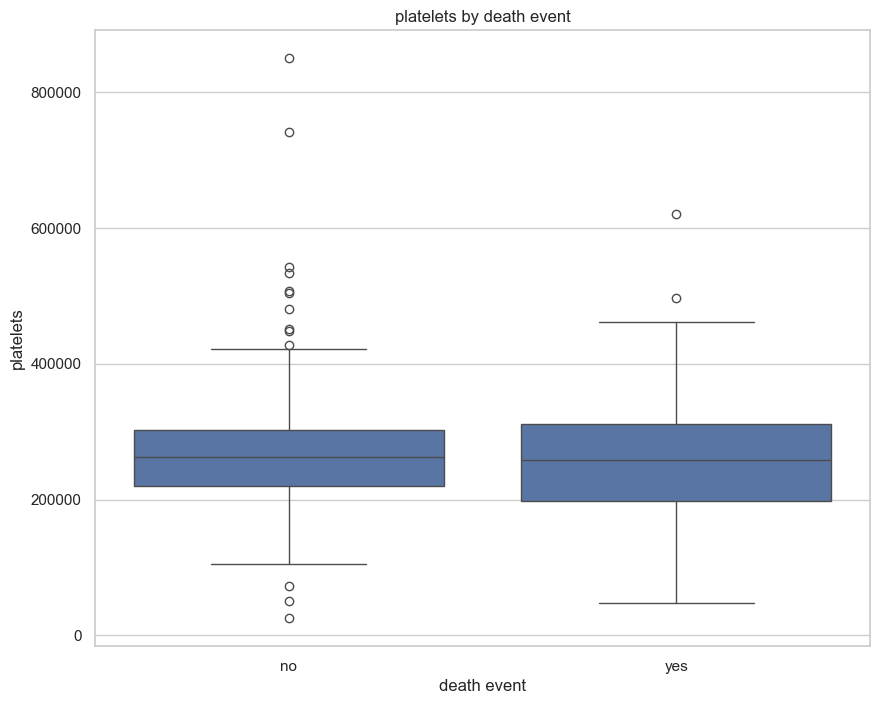

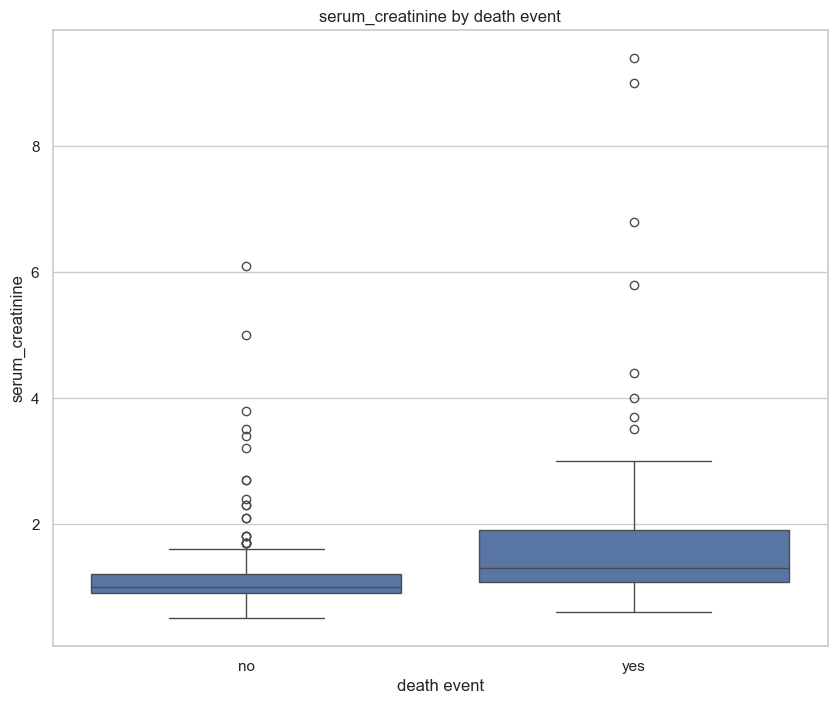

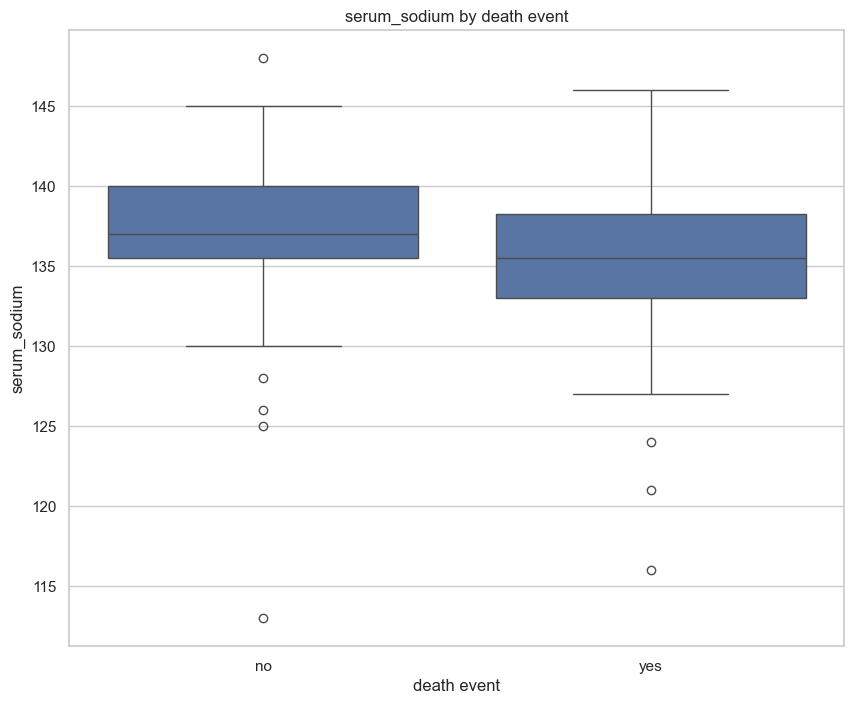

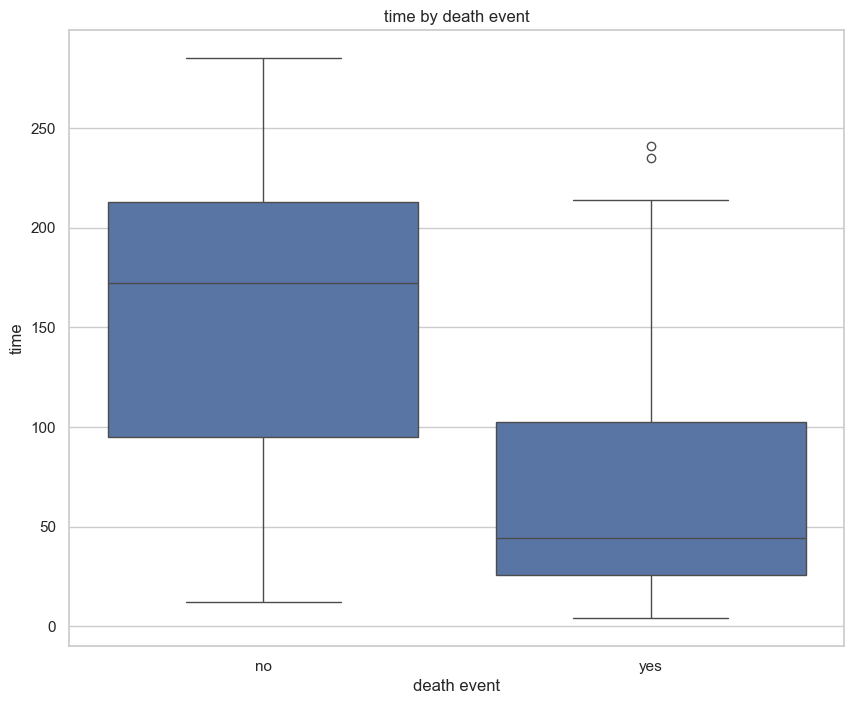

In [66]:
for col in numeric_features:
    plt.figure(figsize=(10,8))
    sns.boxplot(x='death_event', y=col, data=heart_failure_df)
    plt.title(f'{col} by death event')
    plt.ylabel(col)
    plt.xlabel("death event")
    plt.xticks([0,1], ["no", "yes"])
    plt.show()

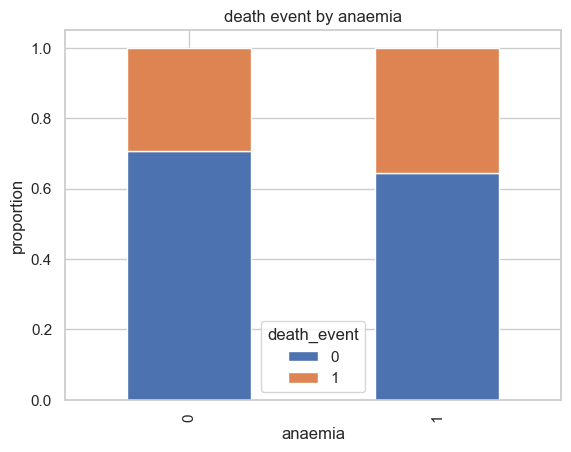

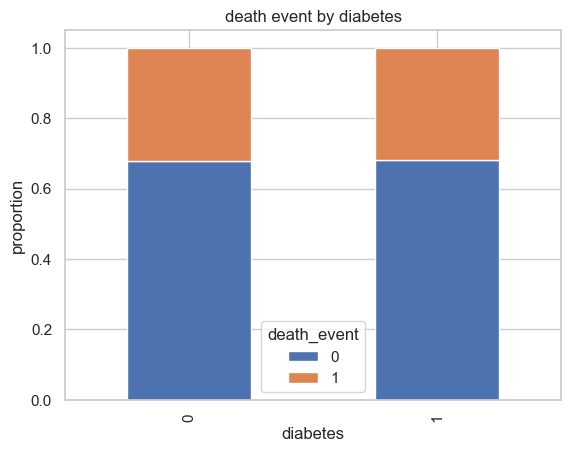

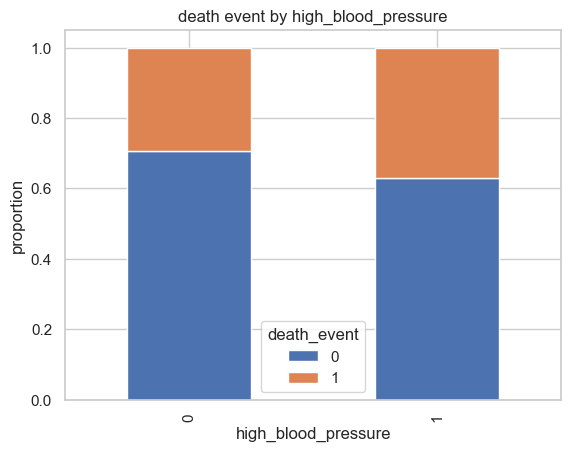

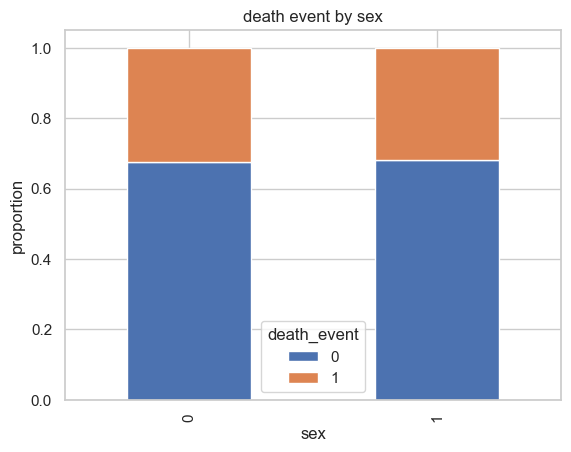

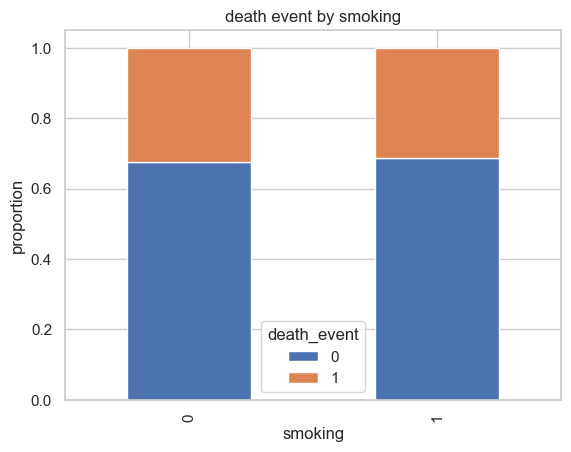

In [68]:
for col in categorical_features:
    pd.crosstab(heart_failure_df[col], heart_failure_df['death_event'], normalize='index').plot(kind='bar', stacked=True)
    plt.title(f'death event by {col}')
    plt.ylabel('proportion')
    plt.show()